In [6]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/courses/Analyzing_Financial_Statements_in_Python/datasets/'
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv(path_data + 'dataset_ch4.csv').drop(columns=['Unnamed: 0'])

Index(['Year', 'comp_type', 'company', 'Ebit', 'Total Revenue', 'Net Income',
       'Cost Of Revenue', 'Total Stockholder Equity', 'Cash', 'Total Assets',
       'Total Liab', 'debt_to_equity'],
      dtype='object')


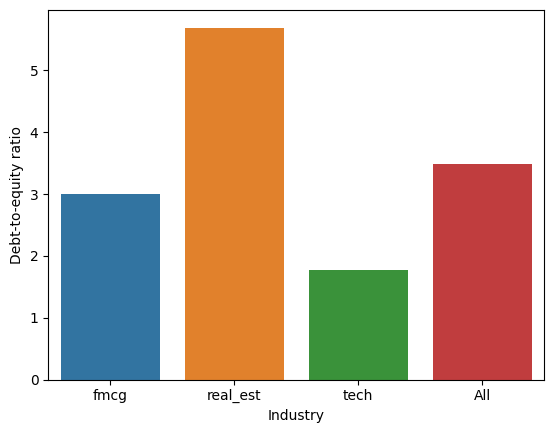

'\nGood job. Plots like this help visualize industry differences. Notice how high the debt-to-equity ratio of real estate companies is. This is because of the high amounts of loans these companies take to purchase real estate like housing. If we did not have margins set to True, we would not have the average debt-to-equity of all the companies in the plot.\n'

In [7]:
# exercise 01

"""
Using margins in pivot tables and making a bar plot

You just learned the margins functionality of pivot_table().

Setting margins = True while using pivot_table() returns the aggfunc of the whole value, i.e., is the aggfunc of the value not conditioned on its index.

In this exercise, you will practice what you've learned. You will make a plot where you prepare the data using pivot_table() and also make use of the margins functionality.

A pandas DataFrame called dataset has been loaded for you. pandas and Seaborn have been loaded with the aliases pd and sns respectively.
"""

# Instructions

"""

    Print the columns of dataset to identify the ones you need to compute the debt-to-equity ratio.
---

    Compute the debt-to-equity ratio and add it as an additional column called "debt_to_equity" in dataset.
    Use pivot_table() to get the average debt-to-equity ratio by industry (given by the column "comp_type"), including an aggregated average for all industries.
---

    Make a bar plot using Seaborn with "comp_type" on the x-axis and the debt-to-equity ratio on the y-axis.

"""

# solution

# Print the columns of the dataset
print(dataset.columns)

# Compute debt-to-equity ratio
dataset["debt_to_equity"] = dataset["Total Liab"]/dataset["Total Stockholder Equity"]

# Use pivot table to compute average debt-to-equity ratios
pivot_data = dataset.pivot_table(index = "comp_type", values = "debt_to_equity", margins=True)

# Make the bar plot
sns.barplot(data=pivot_data.reset_index(), x = 'comp_type', y='debt_to_equity')
plt.xlabel("Industry")
plt.ylabel("Debt-to-equity ratio")
plt.show()
plt.close()

#----------------------------------#

# Conclusion

"""
Good job. Plots like this help visualize industry differences. Notice how high the debt-to-equity ratio of real estate companies is. This is because of the high amounts of loans these companies take to purchase real estate like housing. If we did not have margins set to True, we would not have the average debt-to-equity of all the companies in the plot.
"""

In [12]:
dataset['gross_margin'] = dataset['Total Revenue'] - dataset['Cost Of Revenue']
import numpy as np

In [13]:
# exercise 02

"""
Preparing data for a facet grid plot

In this exercise, you will prepare the data to make this plot: This plot shows the gross margin of tech companies, FMCG companies, the average tech company, and the average FMCG companies over many years. In the next exercise, you'll practice making the plot. This is a neat plot to observe:

    The gross margin of tech companies is more spread out than those of FMCG companies
    Year by year, how profitable a company is compared to the average company in its industry.

pandas is loaded with the alias pd and seaborn is loaded with the alias sns. A pandas DataFrame dataset is loaded for you which already has a gross_margin column computed.
"""

# Instructions

"""

    Make a DataFrame with only tech and FMCG companies; you can subset "tech" and "fmcg" companies from the column "comp_type" in the DataFrame dataset.
---

    Use pivot_table() to compute tech and FMCG companies' average yearly gross margin ratio.
---

    Add the column "company" to the DataFrame subset_dat_avg, using np.where so that the entries of the column "company" is "Avg tech" when the entries of the column "comp_type" is "tech" and "Avg fmcg" when the entries of the column "comp_type" is "fmcg".
    Concatenate both DataFrames subset_dat and subset_dat_avg to prepare them for plotting.

"""

# solution

# Subset tech and fmcg companies
subset_dat = dataset.loc[dataset["comp_type"].isin(["tech", "fmcg"])]

# Compute yearly average gross margin ratio of tech and fmcg companies
subset_dat_avg = subset_dat.pivot_table(index=["Year", "comp_type"], values = "gross_margin").reset_index()

# Add company column
subset_dat_avg["company"] = np.where(subset_dat_avg["comp_type"]=="tech", "Avg tech", "Avg fmcg")
                         
# Concatenate the DataFrames
plot_df = pd.concat([subset_dat, subset_dat_avg], axis=0)

#----------------------------------#

# Conclusion

"""
Good job! This exercise shows us how much data preparation needs to be done to make neat plots!
"""

'\nGood job! This exercise shows us how much data preparation needs to be done to make neat plots!\n'

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


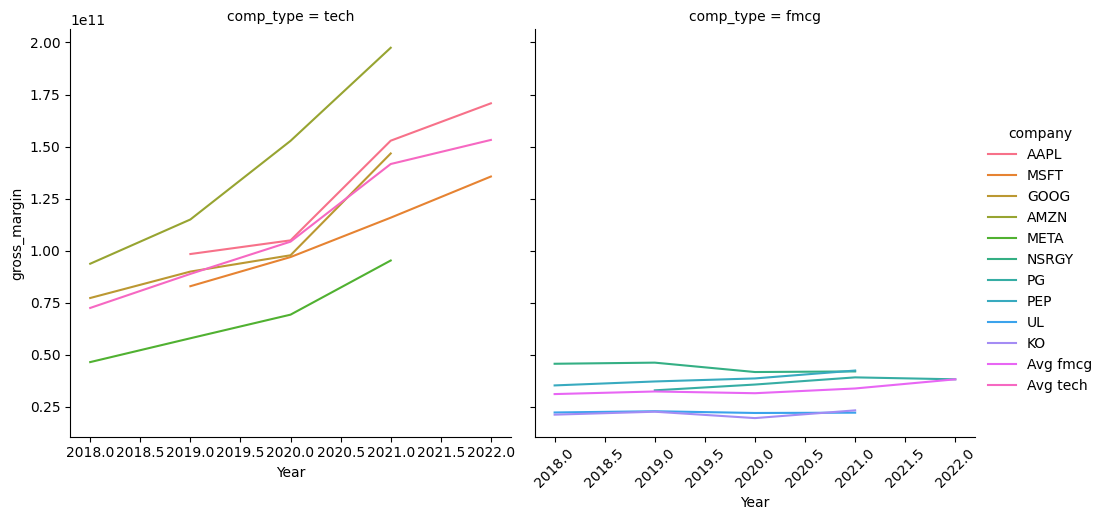

'\nWell done! The plot looks neat. However, notice that the code used has many repetitions, i.e., it performs the same actions for the tech and FMCG datasets. In the next exercise, you will practice with a user-defined function where the code is much more streamlined.\n'

In [16]:
# exercise 03

"""
Making a facet grid plot

In the previous exercise, you wrote the following code:

# Subset tech and fmcg companies
subset_dat = dataset.loc[dataset["comp_type"].isin(["tech", "fmcg"])]

# Compute yearly average gross margin ratio of tech and fmcg companies
subset_dat_avg = subset_dat.pivot_table(index=["Year", "comp_type"], values = "gross_margin").reset_index()

#Add column company
subset_dat_avg["company"] = np.where(subset_dat_avg["comp_type"]=="tech", "Avg tech", "Avg fmcg")

#Concat the DataFrames
plot_df = pd.concat([subset_dat, subset_dat_avg], axis=0)

The code prepared the data to make the following plot: This plot shows the gross margin of tech companies, FMCG companies, the average tech company, and the average FMCG companies over many years.

Now it's time to make the plot.
"""

# Instructions

"""


    Use the DataFrame plot_df to make the facet grid plot in the description using seaborn.

"""

# solution

# Make the plot
sns.relplot(data=plot_df.reset_index(drop=True), x='Year', y='gross_margin',col='comp_type', kind='line',errorbar=None, hue='company')
plt.xticks(rotation=45)
plt.show()
plt.close()

#----------------------------------#

# Conclusion

"""
Well done! The plot looks neat. However, notice that the code used has many repetitions, i.e., it performs the same actions for the tech and FMCG datasets. In the next exercise, you will practice with a user-defined function where the code is much more streamlined.
"""

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


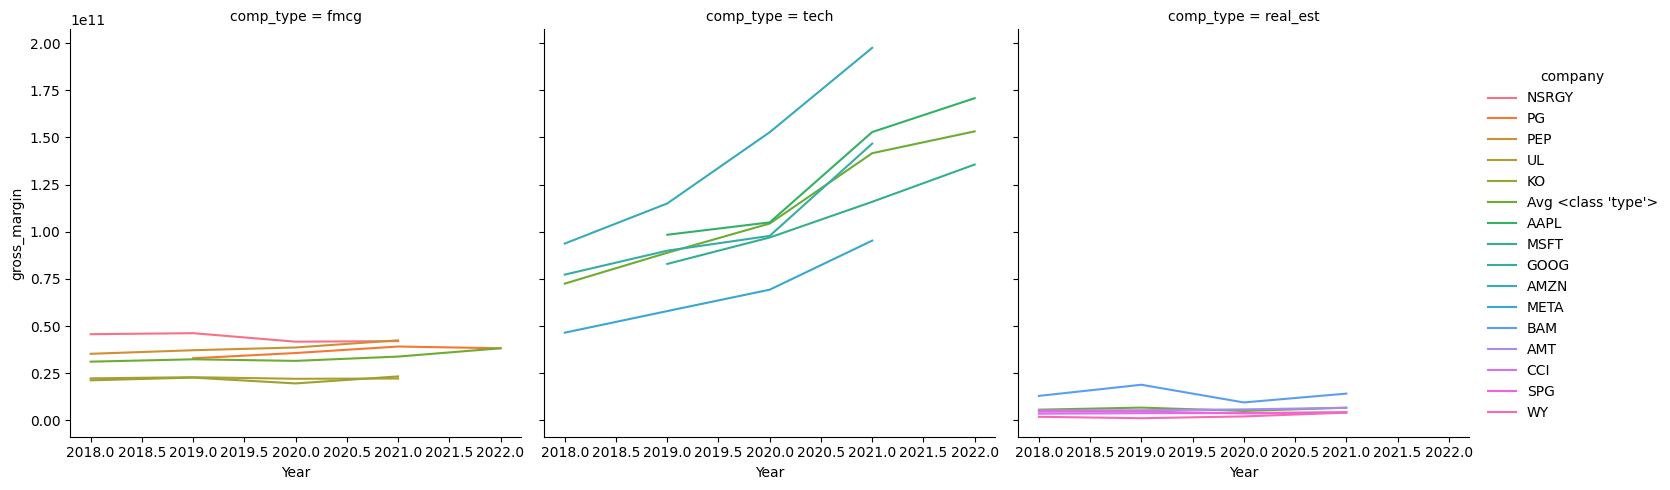

'\nWell done! Using user-defined functions is a great way of reducing repetitive work. The code we used in the last exercise was much longer and specific to only plotting the gross margin ratio and making two facets - for tech and FMCG companies. This more general code can plot any ratio and make facets for as many industries as required. And to top it off, it is much shorter!\n'

In [20]:
# exercise 04

"""
User-defined function to make plots

In the last exercise, you had to write this code to make the plot:

# Subset tech and fmcg companies
subset_dat = dataset.loc[dataset["comp_type"].isin(["tech", "fmcg"])]

# Compute yearly average gross margin ratio of tech and fmcg companies
subset_dat_avg = subset_dat.pivot_table(index=["Year", "comp_type"], values = "gross_margin").reset_index()

# Add column company
subset_dat_avg["company"] = np.where(subset_dat_avg["comp_type"]=="tech", "Avg tech", "Avg fmcg")

# Concat the DataFrames
plot_df = pd.concat([subset_dat, subset_dat_avg], axis=0)

# Make the plot
sns.relplot(data=plot_df.reset_index(drop=True), x="Year", y="gross_margin", hue="company", col="comp_type", kind="line")
plt.show()
plt.close()

Notice that we perform the same actions on the tech and FMCG DataFrames in this exercise. This is repetitive and goes against a coding principle called DRY - Don't repeat yourself. Repetitive code is bad since it increases your work and makes your code more prone to mistakes. In this exercise, you will define your function to process data and plot figures.
"""

# Instructions

"""
Question

Look at this function - this function can make the same plot that you did in the last exercise but with the repetitiveness stripped out.

def make_plot(dataset, ratio, comp_type):
  whole_dat = []
  for industry in comp_type:
    dat = dataset.loc[dataset["comp_type"]==industry]
    dat_avg = dat.pivot_table(index="Year", values=ratio).reset_index()
    dat_avg["company"], dat_avg["comp_type"] = f"Avg {type}", industry"
    whole_dat.append(pd.concat([dat, dat_avg]))

  plot_df = pd.concat(whole_dat).reset_index(drop=True)
  sns.relplot(data=plot_df, x="Year", y="gross_margin", hue="company", col="comp_type", kind="line")
  plt.show()
  plt.close()

This function uses an f-string, with f"Avg {industry}". This f-string will return Avgand the value of industry as an output. Also notice a drop=True in reset_index(). This will reset the index of the DataFrame but not add the old index as a column.

How many comp_types can this function take? The function is loaded in the console for you to test it. The pandas DataFrame dataset is also available with gross margin computed.
(AS many as the user puts inside a list)
---

    Use the function make_plot() to plot the gross margin ratio of real estate, FMCG, and tech companies over the years, along with their industry average gross margin over the years.

"""

# solution

def make_plot(dataset, ratio, comp_type):
  whole_dat = []
  for industry in comp_type:
    dat = dataset.loc[dataset["comp_type"]==industry]
    dat_avg = dat.pivot_table(index="Year", values=ratio).reset_index()
    dat_avg["company"], dat_avg["comp_type"] = f"Avg {type}", industry
    whole_dat.append(pd.concat([dat, dat_avg]))

  plot_df = pd.concat(whole_dat).reset_index(drop=True)
  sns.relplot(data=plot_df, x="Year", y="gross_margin", hue="company", col="comp_type", kind="line")
  plt.show()
  plt.close()

#----------------------------------#

# Plot the gross margin ratio
make_plot(dataset, 'gross_margin', ['fmcg', 'tech', 'real_est'])

#----------------------------------#

# Conclusion

"""
Well done! Using user-defined functions is a great way of reducing repetitive work. The code we used in the last exercise was much longer and specific to only plotting the gross margin ratio and making two facets - for tech and FMCG companies. This more general code can plot any ratio and make facets for as many industries as required. And to top it off, it is much shorter!
"""

In [22]:
dataset = pd.read_csv(path_data+'ds_ex05.csv').drop(columns=['Unnamed: 0'])

Index(['Year', 'comp_type', 'company', 'Ebit', 'Total Revenue',
       'Total Operating Expenses', 'Net Income', 'Cost Of Revenue',
       'Total Stockholder Equity', 'Cash', 'Total Assets', 'Total Liab',
       'operating_margin', 'debt_to_equity'],
      dtype='object')


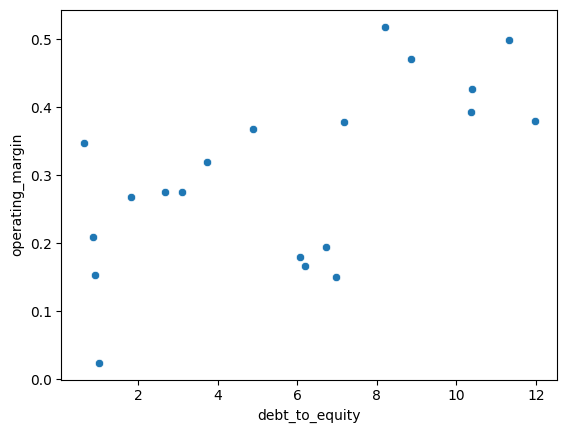

'\nGood job making the scatter plot. From analyzing the plot, the higher the debt-to-equity ratio, the higher the gross margin of real estate companies. This is not uncommon for real estate companies that take loans to purchase assets that help them grow quickly, yielding better profits.\n'

In [23]:
# exercise 05

"""
Relationship between operating margin and debt-to-equity for real estate companies

Scatter plots are a great way of seeing the relationship between two variables. In this exercise, you'll practice computing the operating margin and debt-to-equity ratio. You'll then make a scatter plot to see if there is any relationship between the operating margin and debt-to-equity ratio for real estate companies.

pandas ans Seaborn have been loaded with the alias pd and sns, respectively. You can use the pandas DataFrame dataset to compute the ratios. The console will have the columns of dataset printed so you see which columns to use to compute the ratios.
"""

# Instructions

"""

    Compute the operating margin ratio.
    Compute the debt-to-equity ratio.
---

    Subset the dataset DataFrame using the column comp_type to get only real_est companies.
    Use seaborn to make a scatter plot with debt-to-equity on the x-axis and operating margin on the y-axis.

"""

# solution

# Check the columns
print(dataset.columns)

# Compute the operating margin
dataset["operating_margin"] = (dataset["Total Revenue"] - dataset["Total Operating Expenses"])/dataset["Total Revenue"]

# Compute debt-to-equity
dataset["debt_to_equity"] = dataset["Total Liab"]/dataset["Total Stockholder Equity"]

# Subset the fmcg companies
dataset_real_est = dataset.loc[dataset['comp_type'] == 'real_est']

# Make the plot
sns.scatterplot(data=dataset_real_est, x='debt_to_equity', y='operating_margin')
plt.show()
plt.close()

#----------------------------------#

# Conclusion

"""
Good job making the scatter plot. From analyzing the plot, the higher the debt-to-equity ratio, the higher the gross margin of real estate companies. This is not uncommon for real estate companies that take loans to purchase assets that help them grow quickly, yielding better profits.
"""

In [5]:
# exercise 06

"""
Practice with sns.regplot()

In this exercise, you will check for any relationship between the operating margin and debt-to-equity ratio for all the companies in our dataset. You will first make a scatter plot to analyze the relationship and will be able to discern a relatively clear positive relationship between the debt-to-equity ratio and operating margin. Then you will use sns.regplot to get a line of best fit to confirm or reject the hypothesis that there is a positive relationship between the two ratios.

The pandas DataFrame dataset is loaded with debt-to-equity and operating margin ratio already computed. pandas and seaborn is loaded with alias pd and sns respectively.
"""

# Instructions

"""


    Use Seaborn to make a scatter plot with the debt-to-equity ratio on the x-axis and the operating margin on the y-axis.

    ---

    Use Seaborn to make a scatter plot along with a line of best fit with debt-to-equity ratio on the x-axis and operating margin on the y-axis.

"""

# solution

# Make the scatterplot
sns.scatterplot(data=dataset, x='debt_to_equity', y='operating_margin')
plt.show()
plt.close()

#----------------------------------#

# Make the scatterplot
sns.regplot(data=dataset, x='debt_to_equity', y='operating_margin')
plt.show()
plt.close()

#----------------------------------#

# Conclusion

"""
Good job! Trying to find the relationship between two ratios using a simple scatterplot might lead to incorrect conclusions. Making use of a line of best fit on the scatter plot will make our analysis more refined. From this final plot, we see that the confidence bands around the line of best fit are too wide to conclude whether there is a positive relationship between operating margin and debt-to-equity ratio.
"""

'\n\n'

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


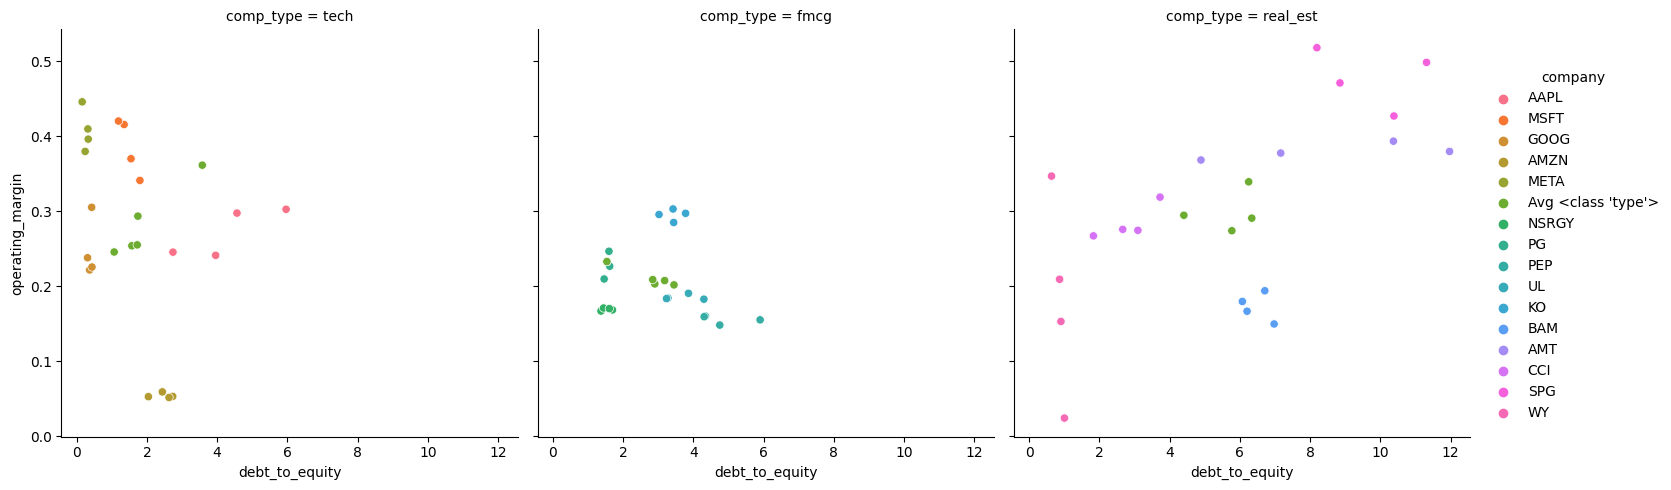

'\nWell done! Notice how this function is more general than the one previously defined. This is to use the function in more places, reducing repetitive work even further for us.\n'

In [24]:
# exercise 07

"""
Updating the user-defined function for plotting

Recall the function to make plots from an earlier exercise:

def make_plot(dataset, ratio, comp_type):
  whole_dat = []
  for industry in comp_type:
    dat = dataset.loc[dataset["comp_type"]==industry]
    dat_avg = dat.pivot_table(index="Year",
                              values=ratio).reset_index()
    dat_avg["company"] = f"Avg {type}"
    dat_avg["comp_type"] = industry
    whole_dat.append(pd.concat([dat,
                                dat_avg]))

  plot_df = pd.concat(whole_dat).reset_index(drop=True)
  sns.relplot(data=plot_df,
              x="Year",
              y="gross_margin",
              hue="company",
              col="comp_type",
              kind="line")
  plt.show()
  plt.close()

Notice how this function can only make line plots with year on the x-axis. In this exercise, you will be introduced to an updated version of this function.
"""

# Instructions

"""

"""

# solution

def make_plot_updated(dataset, x, y, kind, comp_type):
  whole_dat = []
  for industry in comp_type:
    dat = dataset.loc[dataset["comp_type"]==industry]
    values = [x,y if y!="Year" else x]
    dat_avg = dat.pivot_table(index="Year",
                              values=values).reset_index()
    dat_avg = dat_avg.loc[:,
                          ~dat_avg.columns.duplicated()]
    dat_avg["company"] = f"Avg {type}"
    dat_avg["comp_type"] = industry
    whole_dat.append(pd.concat([dat, dat_avg]))

  plot_df = pd.concat(whole_dat).reset_index(drop=True)
  sns.relplot(data=plot_df,
              x=x, y=y,
              hue="company",
              col="comp_type",
              kind=kind)
  plt.show()
  plt.close()

#----------------------------------#

make_plot_updated(dataset, 'debt_to_equity', 'operating_margin', 'scatter', ['tech', 'fmcg', 'real_est'])

#----------------------------------#

# Conclusion

"""
Well done! Notice how this function is more general than the one previously defined. This is to use the function in more places, reducing repetitive work even further for us.
"""

In [25]:
merged_dat = pd.read_csv(path_data+'merged_dat_ch04.csv').drop(columns=['Unnamed: 0'])

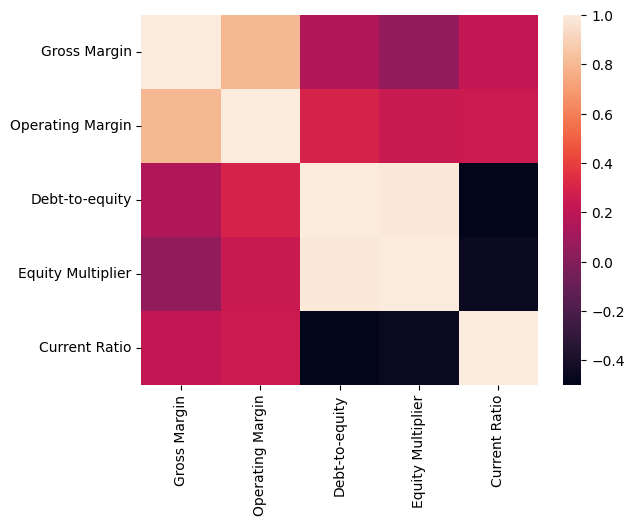

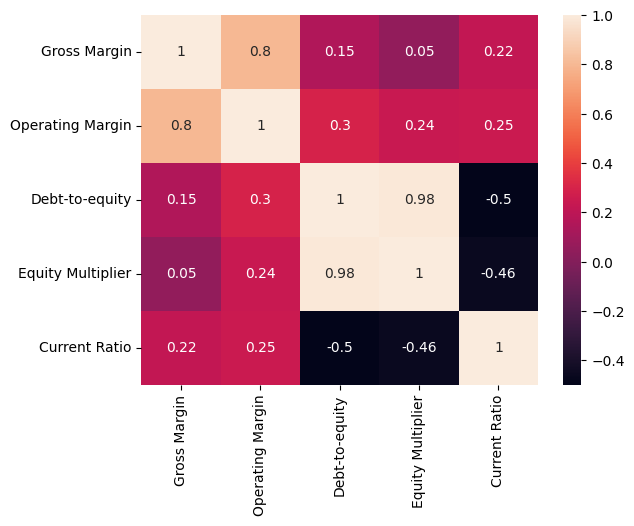

'\nGreat work! Heat maps are an excellent tool for checking correlations between different variables. In the plots you made, unlike in the last video, the data contained all the companies, and you can see that the plot has changed considerably compared to the one in the video.\n'

In [26]:
# exercise 08

"""
Practice making heat maps

Heat maps are a great way to visualize correlations between various financial ratios. They can be used to see which ratios correlate strongly with profitability ratios and thus aid us in deciding which companies to invest in.

In this exercise, you'll practice making heat maps. A pandas DataFrame merged_dat has been loaded for you with some ratios already computed. pandas and Seaborn have been loaded with the aliases pd and sns.
"""

# Instructions

"""

    Use merged_dat with the selected columns to make a correlation matrix.
---

    Make a heat map using the correlation matrix you made.
---
    Make a heat map where the correlations are also mentioned in the rectangular cells on the plot.
"""

# solution

# Make the correlation matrix
corr_mat = merged_dat[["Gross Margin", "Operating Margin", "Debt-to-equity",
                             "Equity Multiplier", "Current Ratio"]].corr()

# Make heat map
sns.heatmap(data = corr_mat)
plt.show()
plt.close()

# Make heat map with annotations
sns.heatmap(data = corr_mat, annot=True)
plt.show()
plt.close()

#----------------------------------#

# Conclusion

"""
Great work! Heat maps are an excellent tool for checking correlations between different variables. In the plots you made, unlike in the last video, the data contained all the companies, and you can see that the plot has changed considerably compared to the one in the video.
"""

In [8]:
# exercise 09

"""
Broad analysis

To check whether a company is doing well financially, you should check how it compares to its competitors in the same industry.

In this exercise, you'll compute the companies' average debt-to-equity ratio, asset turnover ratio, current ratio, and gross margin over several years.

You'll also compute the average of these ratios in the FMCG, Tech, and Real Estate industries over several years and see how the companies' ratios compare to their industry average.
"""

# Instructions

"""


    Use .pivot_table() to compute the average "debt_to_equity","current_ratio", "asset_turnover", "gross_margin" of the companies in the DataFrame statement_info; the column "comp_type" has industry information.
    Use .pivot_table() to compute the average "debt_to_equity", "current_ratio", "asset_turnover", "gross_margin" of the industries in the DataFrame statement_info; the column "comp_type" has industry information.
---


    Melt plot_df to be able to plot it using seaborn.
    Use sns.catplot() to plot the ratios over the x axis and the companies over the y axis with facets - columns per comp_type and rows per the ratios.

"""

# solution

# Compute average by company in each industry
company_avg = statement_info.pivot_table(index=["company", "comp_type"], values=["debt_to_equity","current_ratio","asset_turnover","gross_margin"]).reset_index()

# Compute average in industry
industry_avg = statement_info.pivot_table(index=["comp_type"], values=["debt_to_equity","current_ratio","asset_turnover", "gross_margin"]).reset_index()
industry_avg["company"] = "average"
plot_df = pd.concat([company_avg, industry_avg])

# Melt plot_df to plot it
melt_df = plot_df.melt(id_vars=["company","comp_type"], value_vars =["debt_to_equity","current_ratio","asset_turnover", "gross_margin"], value_name="Ratio" )

# Plot melt_df
sns.catplot(data=melt_df, x="Ratio", y="company",row="variable", col="comp_type"
,kind="bar", sharey=False)
plt.subplots_adjust(hspace=0.25, wspace=2)
plt.show()
plt.close()

#----------------------------------#

# Conclusion

"""
Well done! We see that companies with a high current ratio have a higher gross margin in tech companies. For real estate companies, those with higher debt-to-equity ratios have a higher gross margin. There is no strong relation in the case of FMCG companies.
"""

'\n\n'